# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project: Building a Student Intervention System

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

### Question 1 - Classification vs. Regression
*Your goal for this project is to identify students who might need early intervention before they fail to graduate. Which type of supervised learning problem is this, classification or regression? Why?*

Answer: Regression is used when the data is continuous we need an output which is numeric/real number and not categorical. Classification is used when we group classes based on the categorical nature of the input. We are basically classifying the data into groups. Here we are classifying the students into two groups of "ones who need intervention" and "ones who don't". So it is a classification problem.

## Exploring the Data
Run the code cell below to load necessary Python libraries and load the student data. Note that the last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [2]:
# Import libraries
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score

# Read student data
student_data = pd.read_csv("student-data.csv")
print "Student data read successfully!"

Student data read successfully!


In [3]:
student_data.head(6)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes
5,GP,M,16,U,LE3,T,4,3,services,other,...,yes,no,5,4,2,1,2,5,10,yes


In [3]:
len(student_data.index)

395

In [4]:
student_data.shape[1]

31

In [4]:
student_data_yes=student_data[student_data["passed"]=="yes"]

In [5]:
student_data_yes.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes
5,GP,M,16,U,LE3,T,4,3,services,other,...,yes,no,5,4,2,1,2,5,10,yes
6,GP,M,16,U,LE3,T,2,2,other,other,...,yes,no,4,4,4,1,1,3,0,yes


In [7]:
len(student_data_yes.index)

265

In [8]:
len((student_data[student_data["passed"]=="yes"]).index)

265

In [9]:
len((student_data[student_data["passed"]=="no"]).index)

130

In [6]:
from __future__ import division

1/2

0.5

### Implementation: Data Exploration
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


In [7]:
# TODO: Calculate number of students
n_students = len(student_data.index)

# TODO: Calculate number of features
n_features = student_data.shape[1]-1

# TODO: Calculate passing students
n_passed = len((student_data[student_data["passed"]=="yes"]).index)

# TODO: Calculate failing students
n_failed = n_students-n_passed

# TODO: Calculate graduation rate
grad_rate = (n_passed/n_students)*100

# Print the results
print "Total number of students: {}".format(n_students)
print "Number of features: {}".format(n_features)
print "Number of students who passed: {}".format(n_passed)
print "Number of students who failed: {}".format(n_failed)
print "Graduation rate of the class: {:.2f}%".format(grad_rate)

Total number of students: 395
Number of features: 30
Number of students who passed: 265
Number of students who failed: 130
Graduation rate of the class: 67.09%


## Preparing the Data
In this section, we will prepare the data for modeling, training and testing.

### Identify feature and target columns
It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

Run the code cell below to separate the student data into feature and target columns to see if any features are non-numeric.

In [8]:
student_data.columns[:-1]

Index([u'school', u'sex', u'age', u'address', u'famsize', u'Pstatus', u'Medu',
       u'Fedu', u'Mjob', u'Fjob', u'reason', u'guardian', u'traveltime',
       u'studytime', u'failures', u'schoolsup', u'famsup', u'paid',
       u'activities', u'nursery', u'higher', u'internet', u'romantic',
       u'famrel', u'freetime', u'goout', u'Dalc', u'Walc', u'health',
       u'absences'],
      dtype='object')

In [28]:
# Extract feature columns
feature_cols = list(student_data.columns[:-1])

# Extract target column 'passed'
target_col = student_data.columns[-1] 

# Show the list of columns
print "Feature columns:\n{}".format(feature_cols)
print "\nTarget column: {}".format(target_col)

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = student_data[feature_cols]
y_all = student_data[target_col]


# Show the feature information by printing the first five rows
print "\nFeature values:"
print X_all.head()

Feature columns:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Target column: passed

Feature values:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

    ...    higher internet  romantic  famrel  freetime goout Dalc Walc health  \
0   ...       yes       no        no       4         3     4    1    1      3   
1   ...       

In [9]:
student_data['passed'].head()

0     no
1     no
2    yes
3    yes
4    yes
Name: passed, dtype: object

In [10]:
df_school = student_data[student_data["passed"]=='yes']
df_school_no = student_data[student_data['passed']=='no']

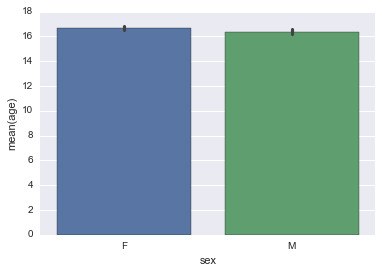

In [18]:
%matplotlib inline
import seaborn as sns
from numpy import mean
ax = sns.barplot(x="sex", y="age", data=df_school, estimator=mean)
ax

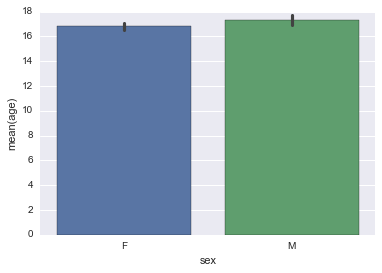

In [19]:
ax_2 = sns.barplot(x='sex',y='age', data=df_school_no,estimator=mean)

In [47]:
df_school_unique = np.unique(student_data['school'])

In [21]:
data = student_data

In [153]:
data['passed']=data['passed'].replace('yes',1)
data['passed']=data['passed'].replace('no',0)

In [98]:
df_1=data[data['passed']==1]
df_2=data[data['passed']==0]

In [107]:
df_4[df_4['passed']==1].shape[0]

27

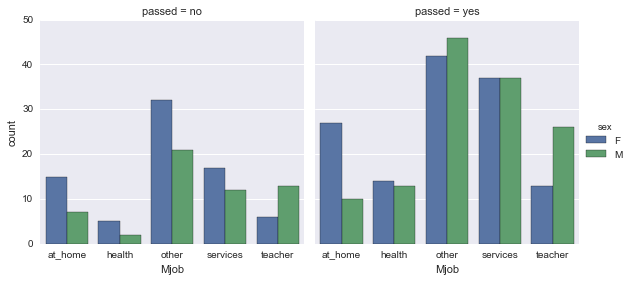

In [23]:
gf_3=sns.factorplot("Mjob", col='passed',hue='sex',data=data,kind='count')

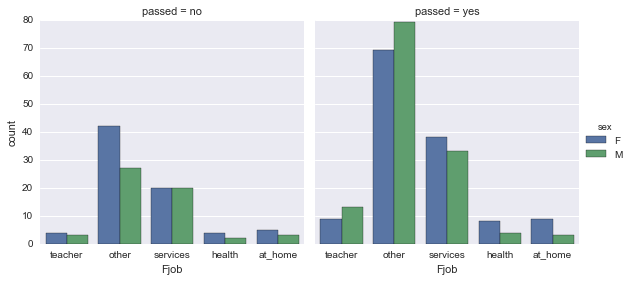

In [24]:
gf_3=sns.factorplot("Fjob", col='passed',hue='sex',data=data,kind='count')

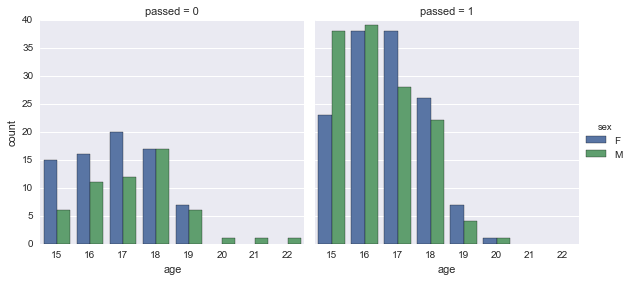

In [160]:
gf_4=sns.factorplot("age", col='passed',hue='sex',data=data,kind='count')

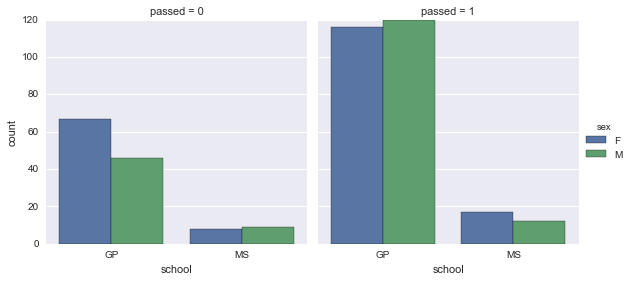

In [154]:
gf_5=sns.factorplot("school", col='passed',hue='sex',data=student_data,kind='count')

In [49]:
df_school_gp = student_data[student_data['school']=='GP']

In [57]:
student_data["failures"].head()

0    0
1    0
2    3
3    0
4    0
Name: failures, dtype: int64

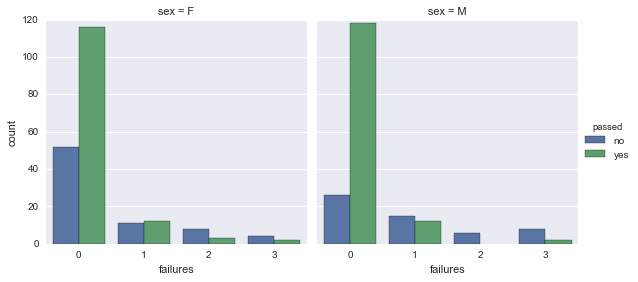

In [25]:
%matplotlib inline
import seaborn as sns
g = sns.factorplot("failures", col="sex", hue="passed",data=student_data, kind="count")

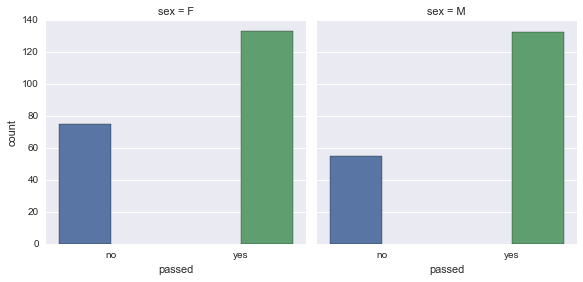

In [61]:
g = sns.factorplot("passed", col="sex", hue="passed",data=data, kind="count")

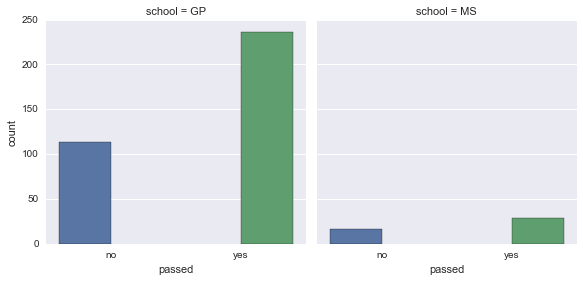

In [26]:
g = sns.factorplot("passed", col="school", hue="passed",data=student_data, kind="count")

### Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

In [29]:
def preprocess_features(X):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        
        # If data type is non-numeric, replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print "Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns))

Processed feature columns (48 total features):
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


### Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. In the following code cell below, you will need to implement the following:
- Randomly shuffle and split the data (`X_all`, `y_all`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [30]:
X_all[0:300].head()


,school_GP,school_MS,sex_F,sex_M,age,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,1,0,1,0,18,0,1,1,0,1,...,1,0,0,4,3,4,1,1,3,6
1,1,0,1,0,17,0,1,1,0,0,...,1,1,0,5,3,3,1,1,3,4
2,1,0,1,0,15,0,1,0,1,0,...,1,1,0,4,3,2,2,3,3,10
3,1,0,1,0,15,0,1,1,0,0,...,1,1,1,3,2,2,1,1,5,2
4,1,0,1,0,16,0,1,1,0,0,...,1,0,0,4,3,2,1,2,5,4


In [16]:
X_all.shape[0]

395

In [17]:
len(y_all)

395

In [18]:
num_train=300
indices = np.arange(num_train)

In [19]:
indices

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [39]:
# TODO: Import any additional functionality you may need here
from sklearn.cross_validation import train_test_split
# TODO: Set the number of training points
num_train = 300


# Set the number of testing points
num_test = X_all.shape[0] - num_train

# TODO: Shuffle and split the dataset into the number of training and testing points above

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=num_test, stratify=y_all, random_state=130)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 300 samples.
Testing set has 95 samples.


## Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data (100 data points, 200 data points, and 300 data points) and measure the F<sub>1</sub> score. You will need to produce three tables (one for each model) that shows the training set size, training time, prediction time, F<sub>1</sub> score on the training set, and F<sub>1</sub> score on the testing set.

**The following supervised learning models are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
*List three supervised learning models that are appropriate for this problem. For each model chosen*
- Describe one real-world application in industry where the model can be applied. *(You may need to do a small bit of research for this — give references!)* 
- What are the strengths of the model; when does it perform well? 
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

**Answer:**  Three good choices for this problem could be 

1) Decision tree 2) Logistic regression and 3) SVM.

**Example of Decision Tree:** Decision tree classifier can be used in banks to classify safe and risky loans. Depending on several features (crdit score, income,terms of loan, how many other loans they have) of a person a decision tree classifier can predict whether approving a loan application is safe or risky.

**Example of Logistic regression:** Logistic regression can be used to predict whether a student who has been granted admission to a school would actually enroll or not. The features could be Age, Sex, Residency in the state where the college is, SAT/GRE/GMAT scores, Economic background, How many people in the family went to school. [http://www.math.montana.edu/grad/writing-projects/09sulock.pdf]

**Example of SVM:** "The classical problem in computer vision, image processing, and machine vision is that of determining whether or not the image data contains some specific object, feature, or activity"-wikipedia. Classification of images can be performed using SVM very efficiently.

**Decision Tree:- Strengths**
    
    1) Easy to understand and explain.
    2) Performs implicit feature selection
    3) Performs very well on relatively large datasets and robust [wikipedia]
    4) nonlinear correlation between features don't affect performance.
**Decision Tree:-Weaknesses**
    
    1) Easily overfit
    2) out of sample prediction could be problematic.
    3) often a small change in the data can affect the tree in a significant way [The Elements of Statistical     Learning]
    
**Reason: ** Decision tree is easy to understand. And since the dataset is not that large and it is a binary classification there is a possiblity if we fix the max_depth that it might perform well.   

**Logistic Regression:- Strengths**
    
    1) It is robust
    2) It performs well with large datasets (most papers I browsed through say that logistic regression performs well on most of their datasets e.g "An experimental comparison of classification algorithms for imbalanced credit scoring data sets." (Iain Brown , Christophe Mues)
    3) Logistic regression is simple, and has low variance. It is also less prone to over-fitting.
**Logistic Regression:-Weaknesses**
    
    1) logistic regression cannot predict continuous outcomes.
    2) Independence of data points is required.
    3) Due to sampling bias it could be probe to overfitting
    
**Reason:** I think for binary classification where data size is not big one should run logistic regression which some kind of L2 or L1 regularization. It performs very well on certain datasets. Even though it has its weaknesses it is well worth a try. In some of the literature I found, even though the datset was imbalanced, that sometime logistic regression's accuracy was close to fancier methods.    
    
**SVM:-Strengths** [http://www.cs.rutgers.edu/~mlittman/courses/ml04/svm.pdf]

    1) Training is relatively easy 
    2) It scales relatively well to high dimensional data
    3) Tradeoff between classifier complexity and error 
       can be controlled explicitly
    4) Non-traditional data like strings and trees can be 
       used as input to SVM, instead of feature vectors
**SVM:-Weaknesses**
    
    1) Need a “good” kernel function
**Answer:** Doing some research I found that there are very few cases where SVM doesn't perform well. It may take time but for feature size of >100 (say) SVM is one of the best to go with. It works well with smaller dataset too maybe at the cost of time complexity.

### Setup
Run the code cell below to initialize three helper functions which you can use for training and testing the three supervised learning models you've chosen above. The functions are as follows:
- `train_classifier` - takes as input a classifier and training data and fits the classifier to the data.
- `predict_labels` - takes as input a fit classifier, features, and a target labeling and makes predictions using the F<sub>1</sub> score.
- `train_predict` - takes as input a classifier, and the training and testing data, and performs `train_clasifier` and `predict_labels`.
 - This function will report the F<sub>1</sub> score for both the training and testing data separately.

In [36]:
def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print "Trained model in {:.4f} seconds".format(end - start)

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Print and return results
    print "Made predictions in {:.4f} seconds.".format(end - start)
    return f1_score(target.values, y_pred, pos_label='yes')


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print "Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    print "F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train))
    print "F1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test))

### Implementation: Model Performance Metrics
With the predefined functions above, you will now import the three supervised learning models of your choice and run the `train_predict` function for each one. Remember that you will need to train and predict on each classifier for three different training set sizes: 100, 200, and 300. Hence, you should expect to have 9 different outputs below — 3 for each model using the varying training set sizes. In the following code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `clf_A`, `clf_B`, and `clf_C`.
 - Use a `random_state` for each model you use, if provided.
 - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Create the different training set sizes to be used to train each model.
 - *Do not reshuffle and resplit the data! The new training points should be drawn from `X_train` and `y_train`.*
- Fit each model with each training set size and make predictions on the test set (9 in total).  
**Note:** Three tables are provided after the following code cell which can be used to store your results.

In [126]:
# TODO: Import the three supervised learning models from sklearn
from sklearn import tree
from sklearn import linear_model
from sklearn import svm

# TODO: Initialize the three models
clf_A = tree.DecisionTreeClassifier(random_state=130)
#clf_A = RandomForestClassifier(n_estimators=10)
#clf_A= GaussianNB()
#clf_A= KNeighborsClassifier(n_neighbors=5,algorithm='auto')
clf_B = linear_model.LogisticRegression(random_state=130)
clf_C = svm.SVC(random_state=130)

# TODO: Set up the training set sizes
X_train_100 = X_train[:100]
y_train_100 = y_train[:100]


X_train_200 = X_train[:200]
y_train_200 = y_train[:200]


X_train_300 =X_train[:300]
y_train_300 = y_train[:300]



print("Decision Tree 100\n")
train_predict(clf_A, X_train_100, y_train_100, X_test, y_test)
print(".....................................")
print("Decision Tree 200\n")
train_predict(clf_A, X_train_200, y_train_200, X_test, y_test)
print(".....................................")
print("Decision Tree 300\n")
train_predict(clf_A, X_train_300, y_train_300, X_test, y_test)
print(".....................................")

print("Logistic Regression 100\n")
train_predict(clf_B, X_train_100, y_train_100, X_test, y_test)
print(".....................................")
print("Logistic Regression 200\n")
train_predict(clf_B, X_train_200, y_train_200, X_test, y_test)
print(".....................................")
print("Logistic Regression 300\n")
train_predict(clf_B, X_train_300, y_train_300, X_test, y_test)
print("......................................")

print("SVM 100\n")
train_predict(clf_C, X_train_100, y_train_100, X_test, y_test)
print(".....................................")
print("SVM 200\n")
train_predict(clf_C, X_train_200, y_train_200, X_test, y_test)
print(".....................................")
print("SVM 300\n")
train_predict(clf_C, X_train_300, y_train_300, X_test, y_test)



Decision Tree 100

Training a DecisionTreeClassifier using a training set size of 100. . .
Trained model in 0.0046 seconds
Made predictions in 0.0005 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0005 seconds.
F1 score for test set: 0.7176.
.....................................
Decision Tree 200

Training a DecisionTreeClassifier using a training set size of 200. . .
Trained model in 0.0019 seconds
Made predictions in 0.0003 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0003 seconds.
F1 score for test set: 0.6154.
.....................................
Decision Tree 300

Training a DecisionTreeClassifier using a training set size of 300. . .
Trained model in 0.0024 seconds
Made predictions in 0.0004 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0003 seconds.
F1 score for test set: 0.6500.
.....................................
Logistic Regression 100

Training a LogisticRegression using a training set size of 100. . .
Trained mo

In [47]:
from sklearn.metrics import f1_score
print "F1 score for predicting all \"no\" on test set: {:.4f}" .format(f1_score(y_test,["no"]*len(y_test),pos_label='no',average='binary'))
print "F1 score for predicting all \"yes\" on test set: {:.4f}" .format(f1_score(y_test,["yes"]*len(y_test),pos_label='yes',average='binary'))

F1 score for predicting all "no" on test set: 0.4921
F1 score for predicting all "yes" on test set: 0.8050


### Tabular Results
Edit the cell below to see how a table can be designed in [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables). You can record your results from above in the tables provided.

** Classifer 1 - Decision Tree**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |     .0005                |    .0005                    |     1              |   .7176              |
| 200               |      .0003         |              .0003          |              1    |             .6154   |
| 300               |      .0004                   |    .0003                   |     1             |      .6500  |

** Classifer 2 - Logistic Regression**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |     .0628                    | .0008                      |  .9296               |           .7786       |
| 200               |    .0005             |          .0002              |           .8451        |           .7621     |
| 300               |    .0006                     |    .0014                    |     .8486             |  .7910        |

** Classifer 3 - SVM**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |    .0018                     |  .0016                     |  .8993                              |  .8392               |
| 200               |     .0039                    |    .0027                    |  .8763                |   .8252              |
| 300               |     .0070                    |     .0023                   |   .8758               |  .8138              |

## Choosing the Best Model
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F<sub>1</sub> score. 

### Question 3 - Choosing the Best Model
*Based on the experiments you performed earlier, in one to two paragraphs, explain to the board of supervisors what single model you chose as the best model. Which model is generally the most appropriate based on the available data, limited resources, cost, and performance?*

**Answer: ** Lets first look at the table 1 i.e the table for Decision Tree classifier. Notice that the predictions have been done pretty fast. Also note that the train score is 1 and testing score is reasonable with a high difference between the two. This suggests overfitting . Table 2 shows the information of Logistic Regression. This classifier performs reasonably well on training size of 200 and 300 and it makes the predictions fast enough and faster than a decision tree classifier. It should also be noted that as the training examples increase from 200 to 300 the logistic regression classifier becomes more accurate.However it seems tuning could improve results as testing accuracy gets closer to training accuracy..Last Table shows the performance of SVM. SVM performs better than all the other two classifiers consistently at the cost of time complexity. SVM classifier takes more time to classify as well as to predict than the logistic regression even though its accuracy is consistently high. Considering the comaprison between the performances of the chosen classifiers we choose the SVM Classifier because of its consistent accuracy. One thing to be noticed is that because of the small size of the dataset the time complexity of SVM, which is more than Logistic regression or Decision tree, does not pose any problem.

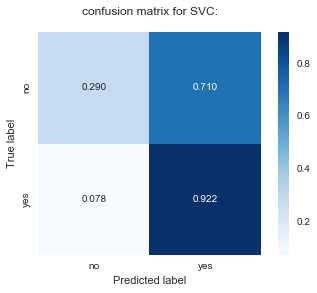

In [114]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

model= clf_C
cm = confusion_matrix(y_test,model.predict(X_test))
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, annot=True,fmt='.3f', cmap='Blues', xticklabels = ['no','yes'], yticklabels = ['no','yes'],square=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('confusion matrix for SVC:\n')

### Question 4 - Model in Layman's Terms
*In one to two paragraphs, explain to the board of directors in layman's terms how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical or technical jargon, such as describing equations or discussing the algorithm implementation.*

**Answer:** Suppose we have to split black and white circles by a drawing a line. There are an infinite number of lines that can probably be drawn. Suppose we draw a line to split these two kinds of circles. Then what does SVM do? Its easy to classify circles which are far from the line. But what about the point close to the line? Its difficult to classify them more than the ones further away from the line. What SVM does is it finds a line which maximizes the distance of these points close to the line.Suppose we need a curved line to split the circles. What would we do then? We apply a clever trick. We dont draw curves lines but lift the observed features into a higher dimensionand draw a the line in the higher dimension which maximizes the distance between the line and the nearest points. Then we project the line to two dimension and in two dimension the line looks curved. This is in essence SVM.(https://www.quora.com/What-does-support-vector-machine-SVM-mean-in-laymans-terms)

Now what is happening in our context:

1) SVM takes data of students (e.g age,gender, family etc) and uses them to create a function that drws a linear boundary between the students who graduated and who didn't. Now as mentioned before there could be infinite number of such boundaries. It chooses the boundary in such a way that the distance of the students closest to the boundary is maximum.

2) Often it is not possible to draw a linear decision boundary in a low dimension. It then lifts the features to a higher dimension and creates a linear boundary between passing and failing students in that higher dimension(technical names being 'hyperplane') and the projection of that boundary looks like a curved boundary in the lower dimension. 

3) We use the training set to create the function which creates the boundary. Now SVM uses the same function to predict whether a new student will pass or not. We check its accuracy by applying it on the test set and observing how accurately it predicts on the test set whose outcomes we already know. This gives us a sense of the robustness of the algorithm.

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
- Initialize the classifier you've chosen and store it in `clf`.
- Create the F<sub>1</sub> scoring function using `make_scorer` and store it in `f1_scorer`.
 - Set the `pos_label` parameter to the correct value!
- Perform grid search on the classifier `clf` using `f1_scorer` as the scoring method, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_obj`.

In [54]:
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import f1_score, make_scorer
from sklearn.preprocessing import normalize
from sklearn import svm


# TODO: Create the parameters list you wish to tune
C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
parameter = dict(gamma=gamma_range, C=C_range)

# TODO: Initialize the classifier
clf = svm.SVC()

# TODO: Make an f1 scoring function using 'make_scorer' 
f1_scorer = make_scorer(f1_score,greater_is_better=True, pos_label='yes')
# TODO: Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = GridSearchCV(clf, parameter, scoring = f1_scorer, cv=None)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train,y_train)

# Get the estimator
clf = grid_obj.best_estimator_

# Report the final F1 score for training and testing after parameter tuning
print "Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, X_train, y_train))
print "Tuned model has a testing F1 score of {:.4f}.".format(predict_labels(clf, X_test, y_test))
print clf

Made predictions in 0.0057 seconds.
Tuned model has a training F1 score of 0.8235.
Made predictions in 0.0028 seconds.
Tuned model has a testing F1 score of 0.8219.
SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


### Question 5 - Final F<sub>1</sub> Score
*What is the final model's F<sub>1</sub> score for training and testing? How does that score compare to the untuned model?*

**Answer: ** It seems that the performance of SVM has improved a lot. Even though in some of the default cases the training score was higher here the training and test scores are very close to each other and reasonably high which suggests that it is in fact a reasonably good predictive model in this case.

In [82]:
cm = pd.DataFrame(grid_obj.grid_scores_)

In [60]:
from IPython.display import  display
d = display(pd.DataFrame(grid_obj.grid_scores_))

,parameters,mean_validation_score,cv_validation_scores
0,"{u'C': 0.01, u'gamma': 1e-09}",0.802395,"[0.802395209581, 0.802395209581, 0.802395209581]"
1,"{u'C': 0.01, u'gamma': 1e-08}",0.802395,"[0.802395209581, 0.802395209581, 0.802395209581]"
2,"{u'C': 0.01, u'gamma': 1e-07}",0.802395,"[0.802395209581, 0.802395209581, 0.802395209581]"
3,"{u'C': 0.01, u'gamma': 1e-06}",0.802395,"[0.802395209581, 0.802395209581, 0.802395209581]"
4,"{u'C': 0.01, u'gamma': 1e-05}",0.802395,"[0.802395209581, 0.802395209581, 0.802395209581]"
5,"{u'C': 0.01, u'gamma': 0.0001}",0.802395,"[0.802395209581, 0.802395209581, 0.802395209581]"
6,"{u'C': 0.01, u'gamma': 0.001}",0.802395,"[0.802395209581, 0.802395209581, 0.802395209581]"
7,"{u'C': 0.01, u'gamma': 0.01}",0.802395,"[0.802395209581, 0.802395209581, 0.802395209581]"
8,"{u'C': 0.01, u'gamma': 0.1}",0.802395,"[0.802395209581, 0.802395209581, 0.802395209581]"
9,"{u'C': 0.01, u'gamma': 1.0}",0.802395,"[0.802395209581, 0.802395209581, 0.802395209581]"


In [98]:
xticks= parameter['gamma']
yticks=parameter['C']

In [93]:
type(xticks)

numpy.ndarray

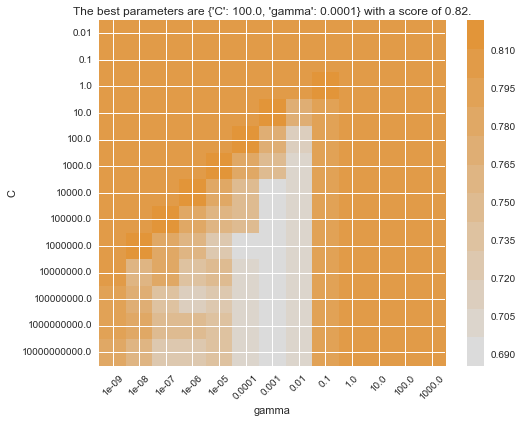

In [120]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import colors
from matplotlib.colors import ListedColormap

ddl_heat = ['#DBDBDB','#DCD5CC','#DCCEBE','#DDC8AF','#DEC2A0','#DEBB91',\
            '#DFB583','#DFAE74','#E0A865','#E1A256','#E19B48','#E29539']
ddlheatmap = colors.ListedColormap(ddl_heat)

scores = [x[1] for x in grid_obj.grid_scores_]
scores = np.array(scores).reshape(len(C_range), len(gamma_range))

plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=ddlheatmap)
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title("The best parameters are {} with a score of {:0.2f}.".format(grid_obj.best_params_, grid_obj.best_score_))
    
plt.show()

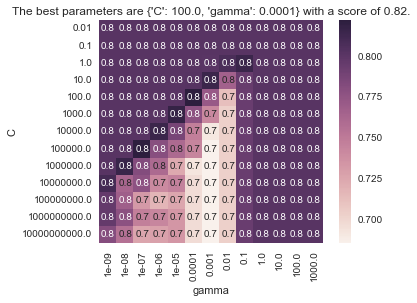

In [123]:
sns.heatmap(scores, fmt='.1f', annot=True, xticklabels=xticks, yticklabels=yticks, square=True)
plt.xlabel('gamma')
plt.ylabel('C')
plt.title("The best parameters are {} with a score of {:0.2f}.".format(grid_obj.best_params_, grid_obj.best_score_))

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.